# Alignment
Notebook for aligning RGB data with depth data.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

In [30]:
from pathlib import Path
if _dh[0] == Path(os.path.abspath(os.path.curdir)):  # Change working directory outside the scripts/ folder
    os.chdir("../")

In [31]:
%matplotlib widget

In [32]:
base_path = Path("./scripts/output/")
frame = "frame_0000.png"
img1 = cv.cvtColor(cv.imread(str(base_path.joinpath(f"./png/{frame}"))), cv.COLOR_BGR2RGB)
img2 = cv.imread(str(base_path.joinpath(f"./depth/{frame}")), cv.IMREAD_UNCHANGED)

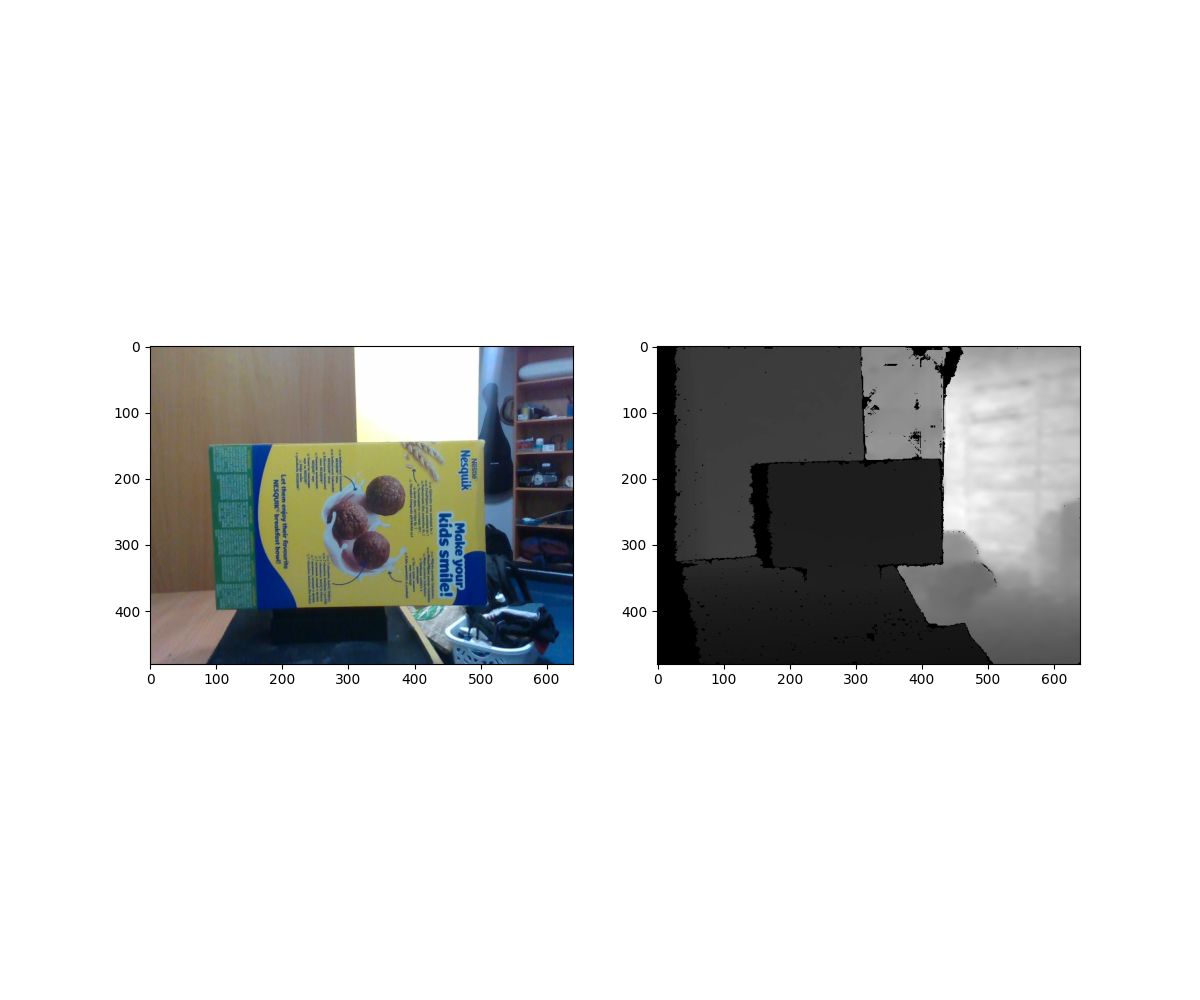

[(99.42258064516128, 393.92580645161297)]
[(99.42258064516128, 393.92580645161297), (90.33870967741936, 148.66129032258073)]


In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 10))
ax1, ax2 = axes
ax1.imshow(img1, cmap="gray")
ax2.imshow(img2, cmap="gray")

points = []
current_axes = None

def on_axes_enter(event):
    global current_axes
    current_axes = event.inaxes

def onclick(event):
    # print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
    #       ('double' if event.dblclick else 'single', event.button,
    #        event.x, event.y, event.xdata, event.ydata))

    if event.key == "shift":
        ax = current_axes
        point = (event.xdata, event.ydata)
        points.append(point)
        ax.scatter(*point)
        print(points)

fig.canvas.mpl_connect("axes_enter_event", on_axes_enter)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [34]:
ref_points = [(100.18836073534513, 395.6719283154122), (89.73051358538558, 150.95830500635907), (503.8612607237832, 142.5920272863915)]
align_points = [(176.12034639842778, 331.33956341773626), (167.76839449647372, 177.20808740894915), (425.9196351023241, 170.37467221644135)]

array([[ 1.60371325e+00, -1.90504597e-02, -1.75946000e+02],
       [ 9.60493941e-03,  1.58717356e+00, -1.31913094e+02]])

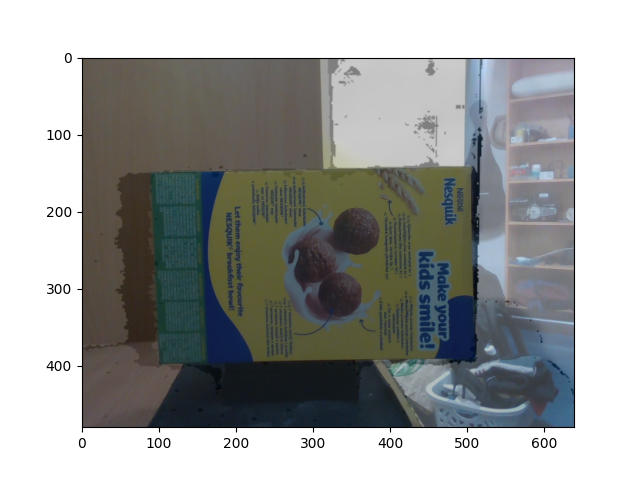

In [35]:
plt.figure()
ref_points = np.float32(ref_points)
align_points = np.float32(align_points)

H = cv.getAffineTransform(align_points[:3], ref_points[:3])

height, width= img2.shape
img2_reg = cv.warpAffine(img2, H, (width, height))

axes = plt.gca()
axes.imshow(img1, cmap="gray")
axes.imshow(img2_reg, cmap="gray", alpha=0.5)
H